# Classification

Les variables qualitatives prennent des valeurs dans un ensemble non ordonné $\mathcal{C}$, comme par exemple : 

couleur des yeux $\in\{$ marron, bleu, vert $\}$ email $\in\{$ spam, ham $\}$.

Étant donné un vecteur de caractéristiques $X$ et un vecteur de réponse qualitative (ce qu'on veut prédire) $Y$ prenant des valeurs dans l'ensemble $\mathcal{C}$, la tâche de classification consiste à construire une fonction $C(X)$ qui prend comme entrée le vecteur de caractéristiques $X$ et prédit sa valeur pour $Y$ ; c'est-à-dire $C(X) \in \mathcal{C}$.

Souvent, nous sommes plus intéressés par l'estimation des probabilités que $X$ appartienne à chaque catégorie de $\mathcal{C}$.

Par exemple, il est plus intéressant de déterminer la probabilité qu'une demande d'assurance soit frauduleuse que de la classer comme frauduleuse ou non.

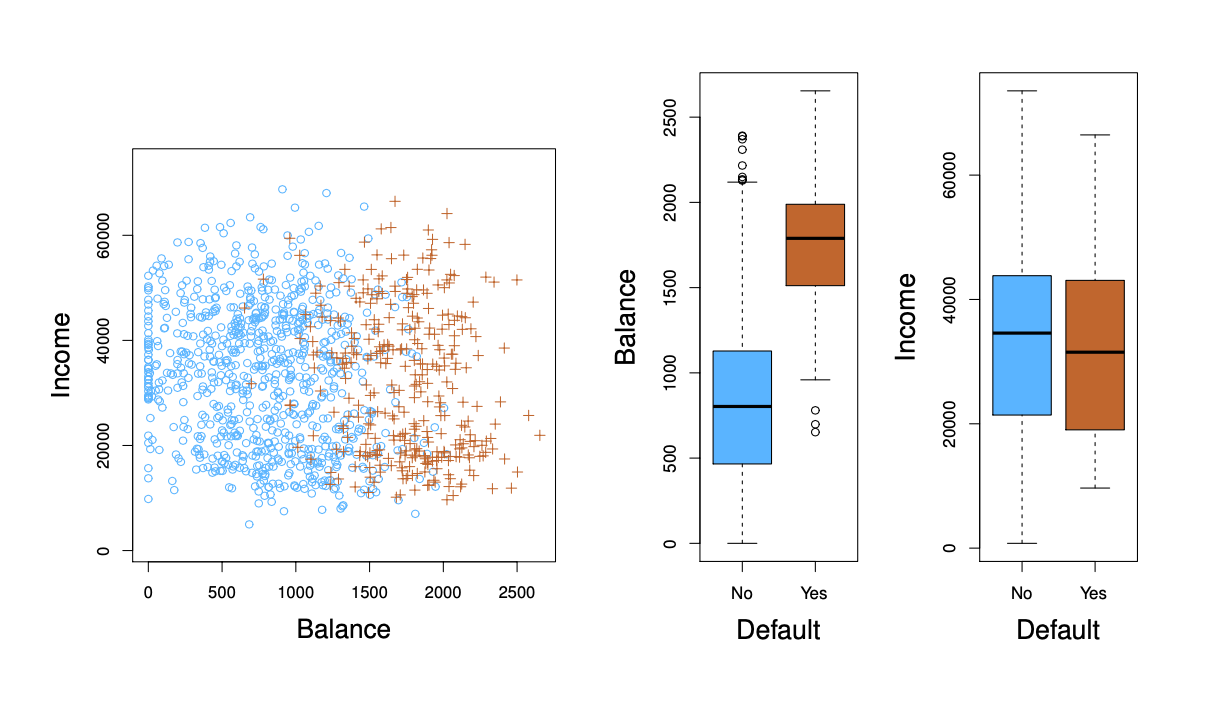

## Peut-on utiliser la régression linéaire?

Supposons que pour la tâche de classification par défaut, nous codons
$$
Y=\left\{\begin{array}{ll}
0 & \text { si  Non } \\
1 & \text { si  Yes. }
\end{array}\right.
$$

Peut-on simplement effectuer une régression linéaire de $Y$ sur $X$ et classer comme Oui si $\hat{Y}>0.5 ?$.

Dans le cas d'un résultat binaire, la régression linéaire fait un bon travail en tant que classificateur, et est équivalente à l'analyse discriminante linéaire dont nous parlerons plus tard. 

Cependant, la régression linéaire peut produire des probabilités inférieures à zéro ou supérieures à un. La régression logistique est plus appropriée.

## Linear versus Logistic Regression

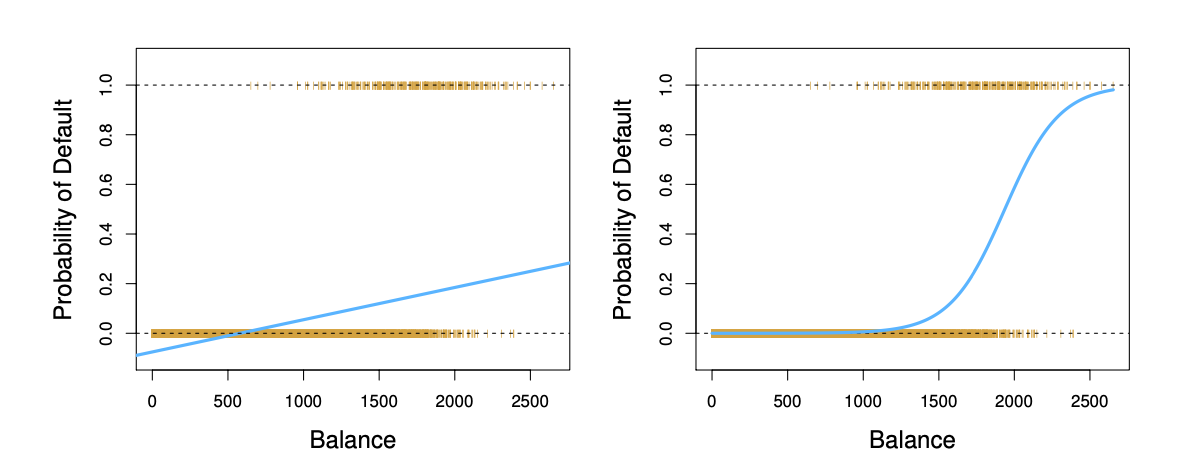

Les marques orange indiquent la réponse $Y$, soit 0 ou 1 . La régression linéaire n'estime pas bien $\operatorname{Pr}(Y=1 \mid X)$. La régression logistique semble bien adaptée à cette tâche.

Supposons maintenant que nous ayons une variable de réponse avec trois valeurs possibles. Un patient se présente aux urgences, et nous devons le classer en fonction de ses symptômes.

$Y=\left\{\begin{array}{ll}1 & \text { si accident vasculaire cérébral; } \\ 2 & \text { si surdose de médicaments; } \\ 3 & \text { si crise d'épilepsie. }\end{array}\right.$

Ce codage suggère un ordre et implique en fait que la différence entre un accident vasculaire cérébral et une surdose de médicaments est la même qu'entre une surdose de médicaments et une crise d'épilepsie.

La régression linéaire n'est pas appropriée ici. La régression logistique multiclasse ou l'analyse discriminante sont plus appropriées.

## La régression logistique

Écrivons $p(X)=\operatorname{Pr}(Y=1 \mid X)$ pour faire court et envisageons d'utiliser l'équilibre pour prédire le défaut de paiement. La régression logistique utilise la forme

$$p(X)=\frac{e^{\beta_{0}+\beta_{1} X}}{1+e^{\beta_{0}+\beta_{1} X}}$$

 Il est facile de voir que quelles que soient les valeurs prises par $\beta_{0}, \beta_{1}$ ou $X$, $p(X)$ aura des valeurs entre 0 et 1 .

Un peu de math et nous obtenons:

$$\log \left(\frac{p(X)}{1-p(X)}\right)=\beta_{0}+\beta_{1} X$$

Cette transformation monotone est appelée la transformation des probabilités ou logit de $p(X)$.

## Linéaire vs Logistique

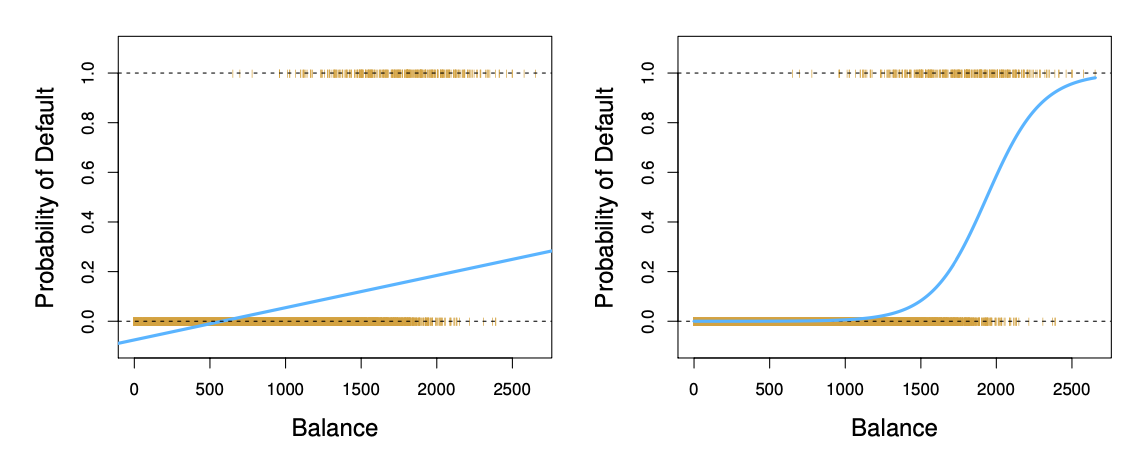

La régression logistique garantit que notre estimation de $p(X)$ se situe entre 0 et 1 .

## Maximum de vraisemblance

Nous utilisons le maximum de vraisemblance pour estimer les paramètres.

$$\ell\left(\beta_{0}, \beta\right)=\prod_{i: y_{i}=1} p\left(x_{i}\right) \prod_{i: y_{i}=0}\left(1-p\left(x_{i}\right)\right)$$

Cette vraisemblance donne la probabilité des `0` et des `1` observés dans les données. Nous choisissons $\beta_{0}$ et $\beta_{1}$ pour maximiser la vraisemblance des données observées.

La plupart des logiciels statistiques permettent d'ajuster des modèles de régression logistique linéaire par maximum de vraisemblance. Dans `R`, nous utilisons la fonction `glm`.

In [12]:
require(ISLR)

In [13]:
?Smarket

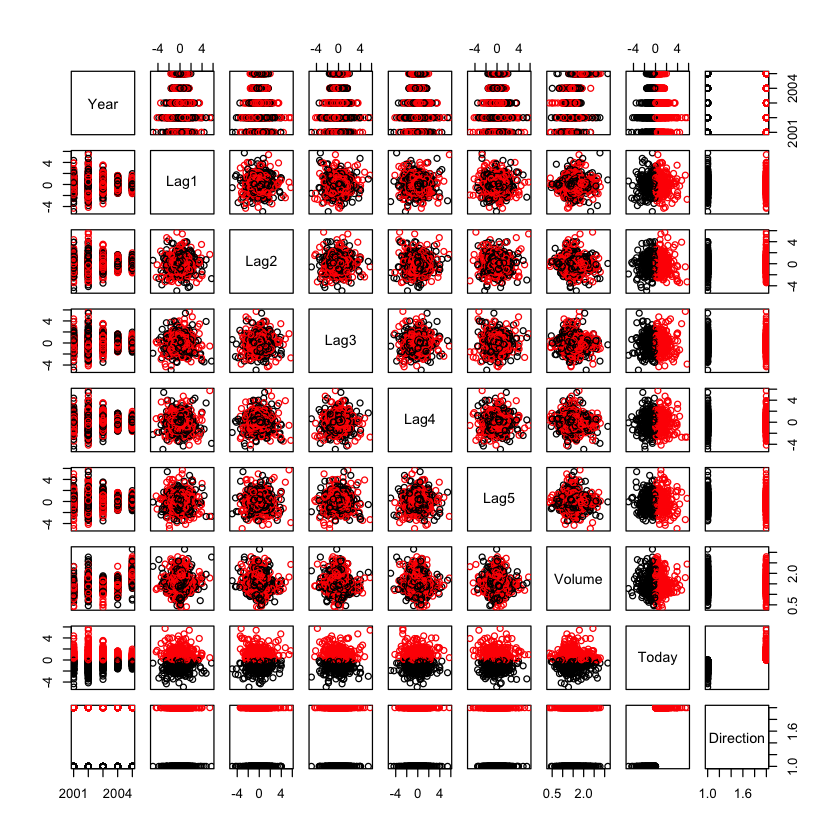

In [5]:
pairs(Smarket,col=Smarket$Direction)

In [6]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial)

In [7]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [9]:
glm.probs=predict(glm.fit,type="response") 
glm.probs[1:5] 

1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

In [10]:
glm.pred=ifelse(glm.probs>0.5,"Up","Down")
attach(Smarket)
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507